In [1]:
import numpy as np
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


In [2]:
all_data_df = pd.read_csv('no_0_solar_with_interpolation.csv')

In [3]:
all_data_df.columns

Index(['Unnamed: 0', 'Date', 'hhmm', 'DHI', 'DNI', 'GHI', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Solar Zenith Angle', 'Fill Flag', 'Surface Albedo', 'Wind Speed',
       'Precipitable Water', 'Wind Direction', 'Relative Humidity',
       'Temperature', 'Pressure', 'Solar', 'Normalized_Solar_lin',
       'Normalized_Solar_geom', 'Normalized_Solar'],
      dtype='object')

In [4]:
all_data_df.head()

,Unnamed: 0,Date,hhmm,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar
0,16,01/01/2013,08:00,13,0,13,50,204,77,4,...,2.9,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07
1,17,01/01/2013,08:30,65,0,65,81,356,160,8,...,3.0,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03
2,18,01/01/2013,09:00,10,0,10,99,487,248,7,...,3.3,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03
3,19,01/01/2013,09:30,14,0,14,114,566,331,8,...,3.3,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03
4,20,01/01/2013,10:00,31,0,31,119,643,409,4,...,3.4,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02


In [5]:
for label in ['Unnamed: 0', 'Date', 'hhmm','Installed', 'Fill Flag']:
    if label in all_data_df.columns:
        all_data_df.drop(label,axis=1,inplace=True)

In [6]:
all_data_df.head()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar
0,13,0,13,50,204,77,4,10.0,82.67,0.143,2.9,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07
1,65,0,65,81,356,160,8,10.0,77.27,0.143,3.0,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03
2,10,0,10,99,487,248,7,10.0,72.18,0.143,3.3,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03
3,14,0,14,114,566,331,8,10.0,67.46,0.143,3.3,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03
4,31,0,31,119,643,409,4,10.0,63.22,0.143,3.4,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02


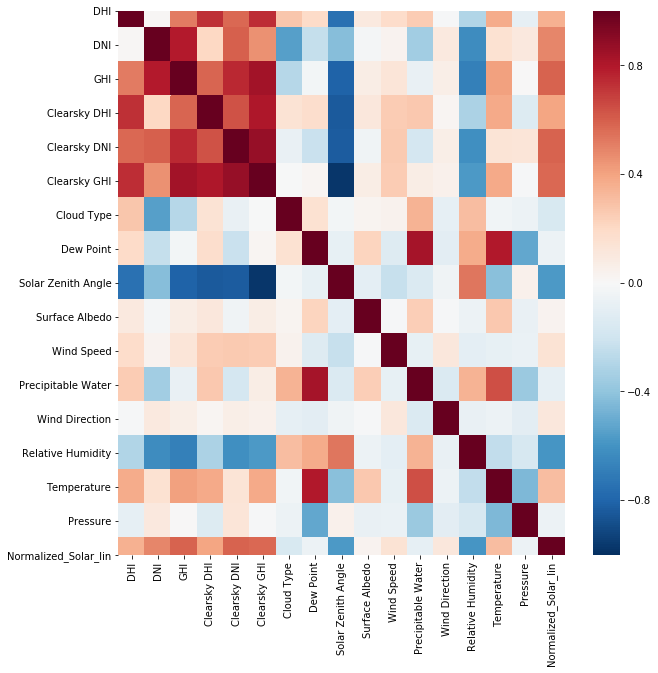

In [7]:
feature_list = ['DHI', 'DNI', 'GHI', 'Clearsky DHI', \
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', \
       'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed', \
       'Precipitable Water', 'Wind Direction', 'Relative Humidity', \
       'Temperature', 'Pressure','Normalized_Solar_lin']

features_df = all_data_df[feature_list]
pearson_corr_df = features_df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches

sns.heatmap(pearson_corr_df, cmap = "RdBu_r", ax=ax, vmin=-1.0, vmax =1.0)

plt.show()

In [10]:
col_no, row_no = pearson_corr_df.shape
for i in range(col_no):
    for j in range(i+1, row_no):
        if pearson_corr_df.iloc[i,j]>0.8:
            print(pearson_corr_df.columns[i]+' and '+pearson_corr_df.columns[j]+' is correlated.')
            print('Pearson correalation value: '+str(pearson_corr_df.iloc[i,j]))

GHI and Clearsky GHI is correlated.
Pearson correalation value: 0.839975387441678
Clearsky DHI and Clearsky GHI is correlated.
Pearson correalation value: 0.805252818736754
Clearsky DNI and Clearsky GHI is correlated.
Pearson correalation value: 0.8681600637431944
Dew Point and Precipitable Water is correlated.
Pearson correalation value: 0.8327738032899878


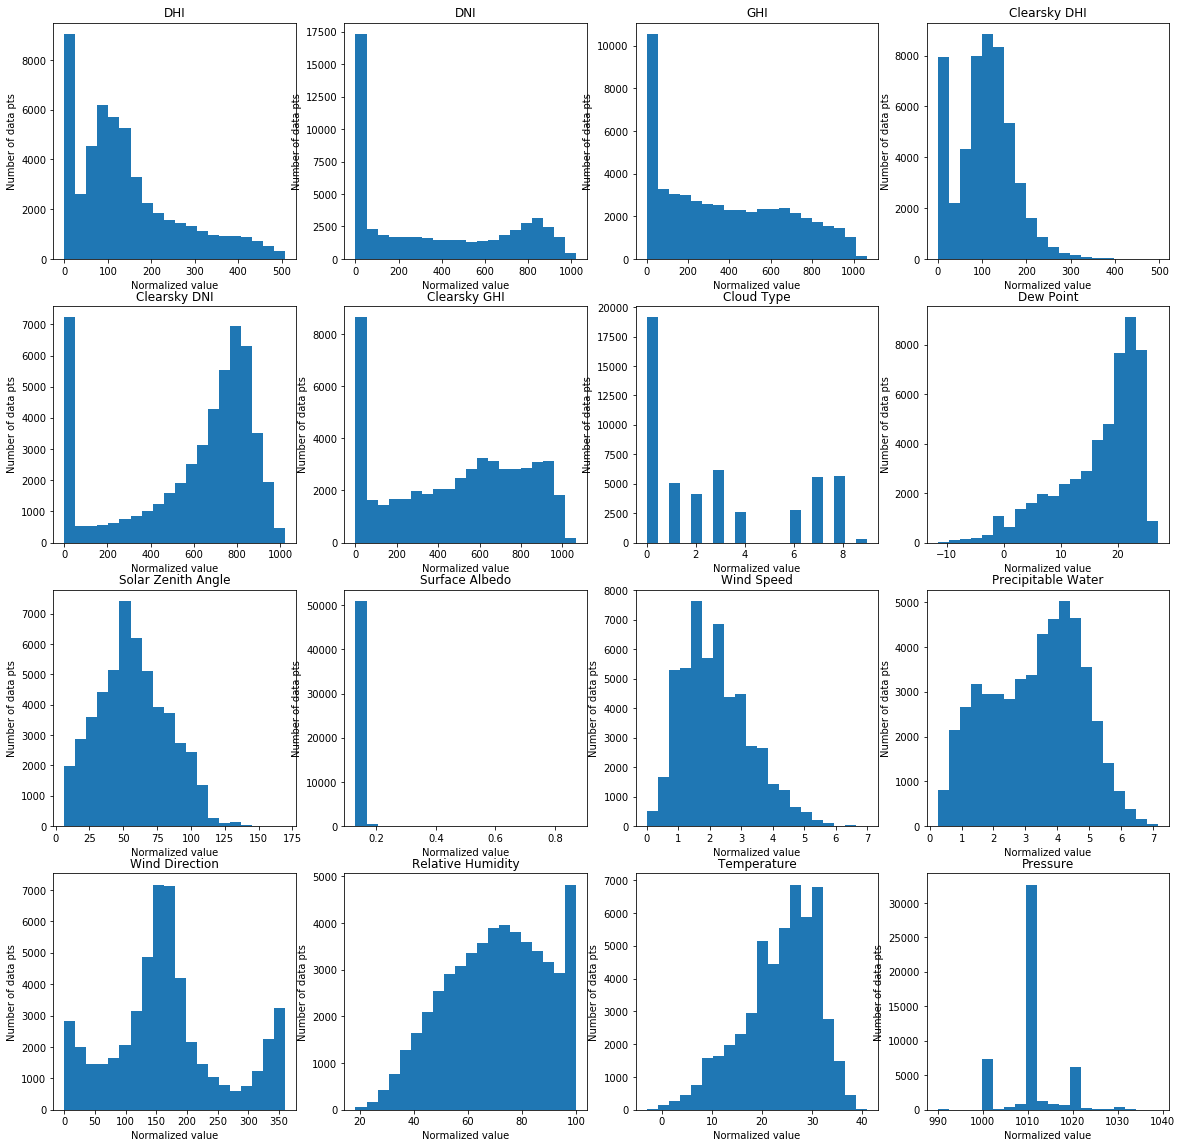

In [11]:
# The distribution of feature value:
feature_list = ['DHI', 'DNI', 'GHI', 'Clearsky DHI', \
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', \
       'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed', \
       'Precipitable Water', 'Wind Direction', 'Relative Humidity', \
       'Temperature', 'Pressure']
len(feature_list)
#for feature in feature_list:

scaler = preprocessing.StandardScaler()

fig, axs = plt.subplots(4, 4, figsize=(20,20))

for i in range(len(feature_list)):
    row,col=divmod(i,4)
    feature=feature_list[i]
    feature_vector = np.array(all_data_df[feature])
    axs[row,col].hist(feature_vector, bins=20)
    axs[row,col].set_title(feature)
    axs[row,col].set_xlabel('Normalized value')
    axs[row,col].set_ylabel('Number of data pts')

With top 4 features, R-squared of testing data is: 0.080
R-squared of training data is: 0.109
With top 5 features, R-squared of testing data is: 0.129
R-squared of training data is: 0.140
With top 6 features, R-squared of testing data is: 0.226
R-squared of training data is: 0.239
With top 7 features, R-squared of testing data is: 0.256
R-squared of training data is: 0.274
With top 8 features, R-squared of testing data is: 0.271
R-squared of training data is: 0.295
With top 9 features, R-squared of testing data is: 0.215
R-squared of training data is: 0.233
With top 10 features, R-squared of testing data is: 0.269
R-squared of training data is: 0.273
With top 11 features, R-squared of testing data is: 0.300
R-squared of training data is: 0.300
With top 12 features, R-squared of testing data is: 0.296
R-squared of training data is: 0.314


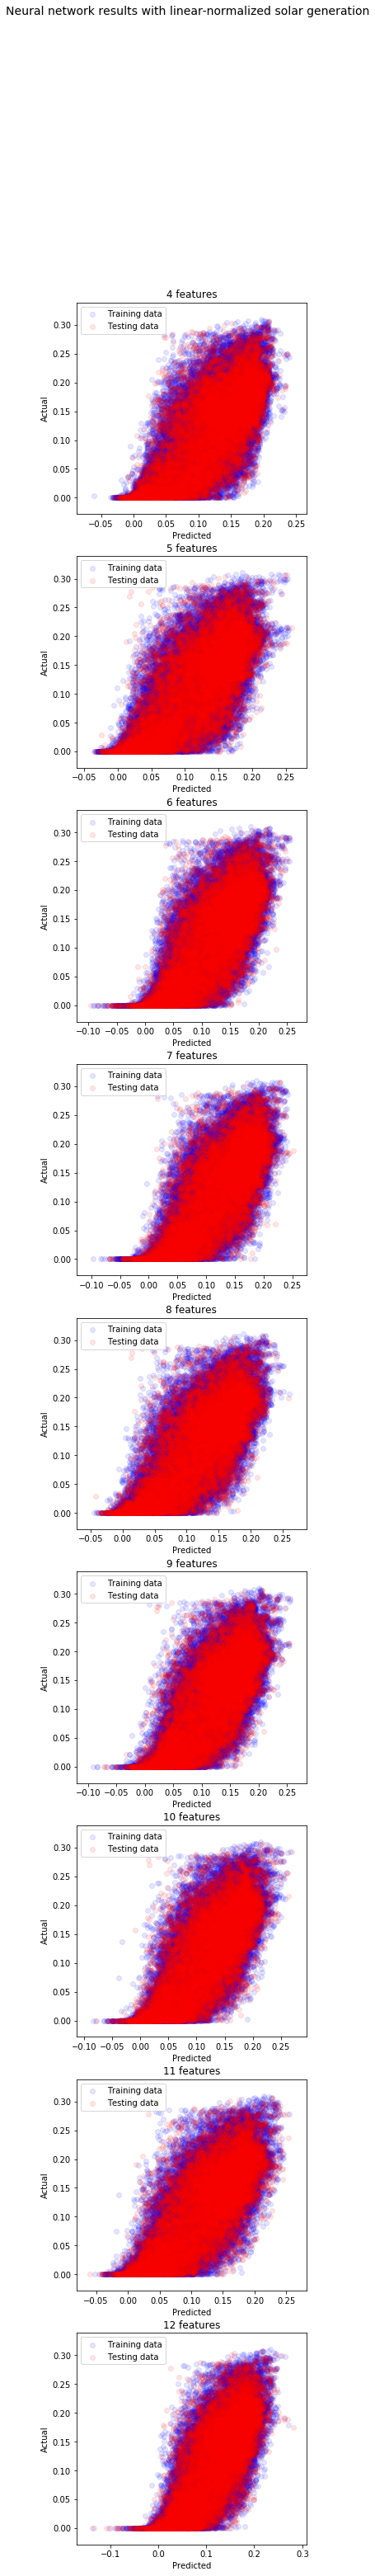

In [78]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)
prediction = 'Normalized_Solar_lin'

min_features=4
scaler = preprocessing.StandardScaler()
fig, axs = plt.subplots(len(ranked_list)-min_features+1, 1, figsize=(5,50))

fig.suptitle('Neural network results with linear-normalized solar generation', fontsize=14)

for i in range(min_features-1,len(ranked_list)):
    feature_list = ranked_list[:i+1]
    X_train = np.array(train[feature_list])
    y_train = np.array(train[prediction])
    X_test = np.array(test[feature_list])
    y_test = np.array(test[prediction])
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.fit_transform(X_test)
    clf = MLPRegressor(solver='lbfgs')
    clf.fit(X_train_standardized,y_train)
    axs[i-min_features+1].scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
    axs[i-min_features+1].scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
    axs[i-min_features+1].set_title(str(i+1)+' features', fontsize=12)
    axs[i-min_features+1].set_xlabel('Predicted')
    axs[i-min_features+1].set_ylabel('Actual')
    axs[i-min_features+1].legend(('Training data', 'Testing data'))
    print('With top '+str(i+1)+' features, R-squared of testing data is: '+"{:.3f}".format(r2_score(clf.predict(X_test_standardized),y_test)))
    print('R-squared of training data is: '+"{:.3f}".format(r2_score(clf.predict(X_train_standardized),y_train)))

With top 4 features, R-squared of testing data is: -0.035
R-squared of training data is: -0.011
With top 5 features, R-squared of testing data is: 0.107
R-squared of training data is: 0.126
With top 6 features, R-squared of testing data is: 0.173
R-squared of training data is: 0.200
With top 7 features, R-squared of testing data is: 0.167
R-squared of training data is: 0.186
With top 8 features, R-squared of testing data is: 0.290
R-squared of training data is: 0.302
With top 9 features, R-squared of testing data is: 0.195
R-squared of training data is: 0.202
With top 10 features, R-squared of testing data is: 0.241
R-squared of training data is: 0.253
With top 11 features, R-squared of testing data is: 0.278
R-squared of training data is: 0.287
With top 12 features, R-squared of testing data is: 0.261
R-squared of training data is: 0.270


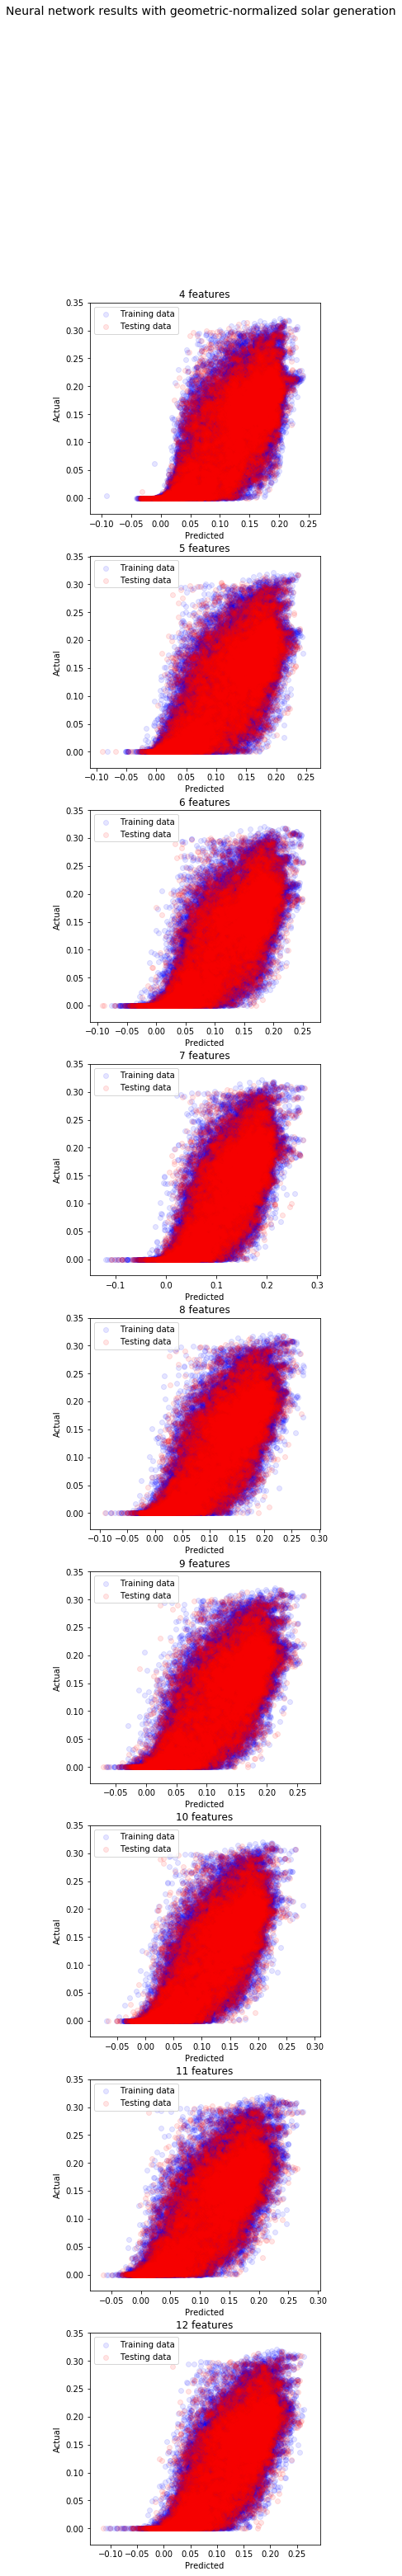

In [79]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)
prediction = 'Normalized_Solar_geom'

min_features=4
scaler = preprocessing.StandardScaler()
fig, axs = plt.subplots(len(ranked_list)-min_features+1, 1, figsize=(5,50))

fig.suptitle('Neural network results with geometric-normalized solar generation', fontsize=14)

for i in range(min_features-1,len(ranked_list)):
    feature_list = ranked_list[:i+1]
    X_train = np.array(train[feature_list])
    y_train = np.array(train[prediction])
    X_test = np.array(test[feature_list])
    y_test = np.array(test[prediction])
    X_train_standardized = scaler.fit_transform(X_train)
    X_test_standardized = scaler.fit_transform(X_test)
    clf = MLPRegressor(solver='lbfgs')
    clf.fit(X_train_standardized,y_train)
    axs[i-min_features+1].scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
    axs[i-min_features+1].scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
    axs[i-min_features+1].set_title(str(i+1)+' features', fontsize=12)
    axs[i-min_features+1].set_xlabel('Predicted')
    axs[i-min_features+1].set_ylabel('Actual')
    axs[i-min_features+1].legend(('Training data', 'Testing data'))
    print('With top '+str(i+1)+' features, R-squared of testing data is: '+"{:.3f}".format(r2_score(clf.predict(X_test_standardized),y_test)))
    print('R-squared of training data is: '+"{:.3f}".format(r2_score(clf.predict(X_train_standardized),y_train)))

With top 11 features, R-squared of testing data is: 0.384
R-squared of training data is: 0.413


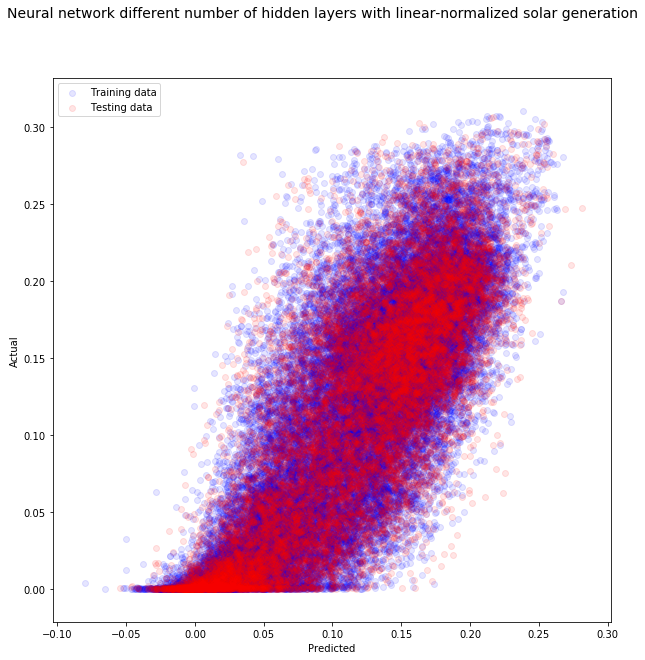

In [23]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)
prediction = 'Normalized_Solar_lin'

feature_list = ranked_list[:11]

X_train = np.array(train[feature_list])
y_train = np.array(train[prediction])
X_test = np.array(test[feature_list])
y_test = np.array(test[prediction])
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)
clf = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(100,100))
clf.fit(X_train_standardized,y_train)

fig, axs = plt.subplots(1, 1, figsize=(10,10))

fig.suptitle('Neural network different number of hidden layers with linear-normalized solar generation', fontsize=14)

axs.scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
axs.scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
axs.set_xlabel('Predicted')
axs.set_ylabel('Actual')
axs.legend(('Training data', 'Testing data'))
print('With top '+str(11)+' features, R-squared of testing data is: '+"{:.3f}".format(r2_score(clf.predict(X_test_standardized),y_test)))
print('R-squared of training data is: '+"{:.3f}".format(r2_score(clf.predict(X_train_standardized),y_train)))
    

With top 11 features, R-squared of testing data is: 0.335
R-squared of training data is: 0.351


(-0.09324926457255592,
 0.2812223518260431,
 -0.021585623606222192,
 0.33188530403934685)

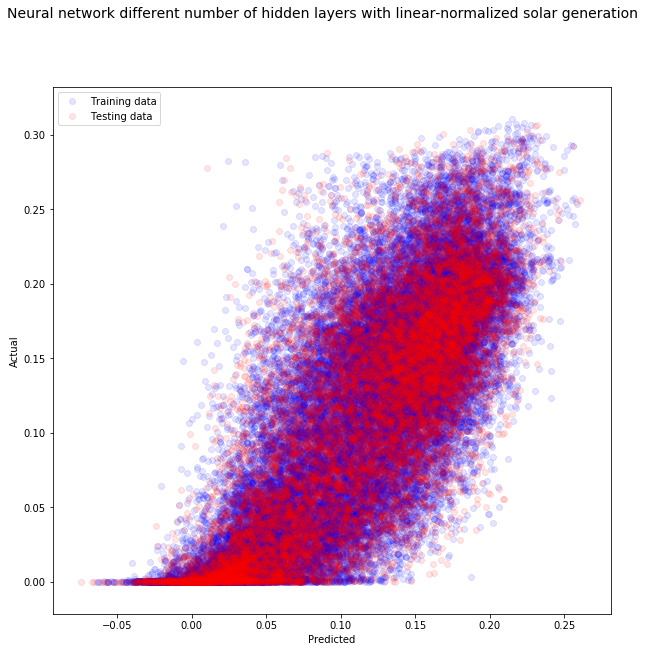

In [25]:
ranked_list = ['Relative Humidity', 'Solar Zenith Angle', 'GHI', 'Surface Albedo','Wind Direction','Temperature','Wind Speed','DNI','DHI','Dew Point','Pressure','Cloud Type']
train,test=train_test_split(all_data_df,test_size=0.3,random_state=100)
prediction = 'Normalized_Solar_lin'

feature_list = ranked_list[:11]

X_train = np.array(train[feature_list])
y_train = np.array(train[prediction])
X_test = np.array(test[feature_list])
y_test = np.array(test[prediction])
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.fit_transform(X_test)
clf = MLPRegressor(solver='lbfgs',hidden_layer_sizes=(100,100))
clf.fit(X_train_standardized,y_train)

fig, axs = plt.subplots(1, 1, figsize=(10,10))

fig.suptitle('Neural network different number of hidden layers with linear-normalized solar generation', fontsize=14)

axs.scatter(clf.predict(X_train_standardized), y_train, alpha = 0.1, color='blue')
axs.scatter(clf.predict(X_test_standardized), y_test, alpha = 0.1, color='red')
axs.set_xlabel('Predicted')
axs.set_ylabel('Actual')
axs.legend(('Training data', 'Testing data'))
print('With top '+str(11)+' features, R-squared of testing data is: '+"{:.3f}".format(r2_score(clf.predict(X_test_standardized),y_test)))
print('R-squared of training data is: '+"{:.3f}".format(r2_score(clf.predict(X_train_standardized),y_train)))
plt.axis('scaled')
